In [2]:
library('foreign')
library('dplyr')
library('ggplot2')
library('readxl')

In [14]:
raw_welfare <- read.spss(file = './doit_r/RMD/Koweps_hpc10_2015_beta1.sav'
                         ,to.data.frame = T)

Warning message in read.spss(file = "./doit_r/RMD/Koweps_hpc10_2015_beta1.sav", :
"./doit_r/RMD/Koweps_hpc10_2015_beta1.sav: Compression bias (0) is not the usual value of 100"


In [15]:
welfare <- raw_welfare

In [16]:
head(welfare)

,h10_id,h10_ind,h10_sn,h10_merkey,h_new,h10_cobf,h10_reg5,h10_reg7,h10_din,h10_cin,⋯,c1007_4aq19,c1007_4aq20,c1007_4aq21,c1007_4aq22,c1007_4aq23,h10_pers_income1,h10_pers_income2,h10_pers_income3,h10_pers_income4,h10_pers_income5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,1,10101,0,NA,1,1,864,864,⋯,NA,NA,NA,NA,NA,NA,NA,NA,0,NA
2,2,1,1,20101,0,NA,1,1,600,600,⋯,NA,NA,NA,NA,NA,NA,NA,NA,0,NA
3,3,1,1,30101,0,NA,1,1,1571,1619,⋯,NA,NA,NA,NA,NA,NA,1440,NA,0,NA
4,4,1,1,40101,0,NA,1,1,3579,3687,⋯,NA,NA,NA,NA,NA,NA,2400,NA,0,NA
5,4,1,1,40101,0,NA,1,1,3579,3687,⋯,NA,NA,NA,NA,NA,NA,NA,NA,0,NA
6,6,1,1,60101,0,NA,1,1,3030,3486,⋯,NA,NA,NA,NA,NA,NA,NA,3000,0,NA


In [19]:
str(welfare)

'data.frame':	16664 obs. of  957 variables:
 $ h10_id          : num  1 2 3 4 4 6 6 6 6 6 ...
 $ h10_ind         : num  1 1 1 1 1 1 1 1 1 1 ...
 $ h10_sn          : num  1 1 1 1 1 1 1 1 1 1 ...
 $ h10_merkey      : num  10101 20101 30101 40101 40101 ...
 $ h_new           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ h10_cobf        : num  NA NA NA NA NA NA NA NA NA NA ...
 $ h10_reg5        : num  1 1 1 1 1 1 1 1 1 1 ...
 $ h10_reg7        : num  1 1 1 1 1 1 1 1 1 1 ...
 $ h10_din         : num  864 600 1571 3579 3579 ...
 $ h10_cin         : num  864 600 1619 3687 3687 ...
 $ h10_flag        : num  0 0 0 0 0 0 0 0 0 0 ...
 $ p10_wgl         : num  777 960 1059 1012 1075 ...
 $ p10_wsl         : num  0.257 0.317 0.35 0.334 0.355 ...
 $ p10_wgc         : num  764 949 1048 992 1057 ...
 $ p10_wsc         : num  0.252 0.314 0.346 0.328 0.349 ...
 $ h10_hc          : num  2 2 1 1 1 1 1 1 1 1 ...
 $ nh1001_1        : num  NA NA NA NA NA NA NA NA NA NA ...
 $ nh1001_2        : num  NA NA NA NA NA NA NA

In [20]:
#summary(welfare)

In [21]:
welfare <- rename(welfare,
                  sex = h10_g3,
                  birth = h10_g4,
                  marriage = h10_g10,
                  religion= h10_g11,
                  income = p1002_8aq1,
                  code_job = h10_eco9,
                  code_region = h10_reg7
)

In [22]:
# 성별에 따른 월급 차이
# 성별,월급
class(welfare$sex)
table(welfare$sex)

[1] "numeric"


   1    2 
7578 9086 

In [23]:
welfare$sex <- ifelse(welfare$sex == 9, NA, welfare$sex)

In [24]:
table(is.na(welfare$sex))


FALSE 
16664 

In [25]:
welfare$sex <- ifelse(welfare$sex == 1, 'male','female')
table(welfare$sex)



female   male 
  9086   7578 

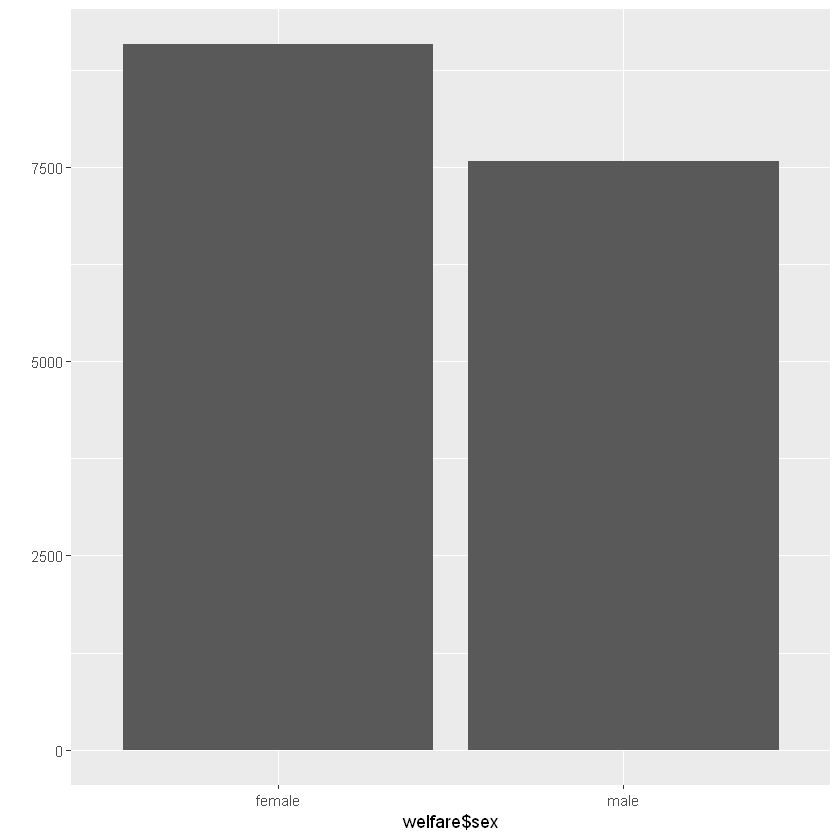

In [26]:
qplot(welfare$sex)

In [27]:
class(welfare$income)
summary(welfare$income)

[1] "numeric"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    0.0   122.0   192.5   241.6   316.6  2400.0   12030 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 12051 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 2 rows containing missing values (geom_bar)."


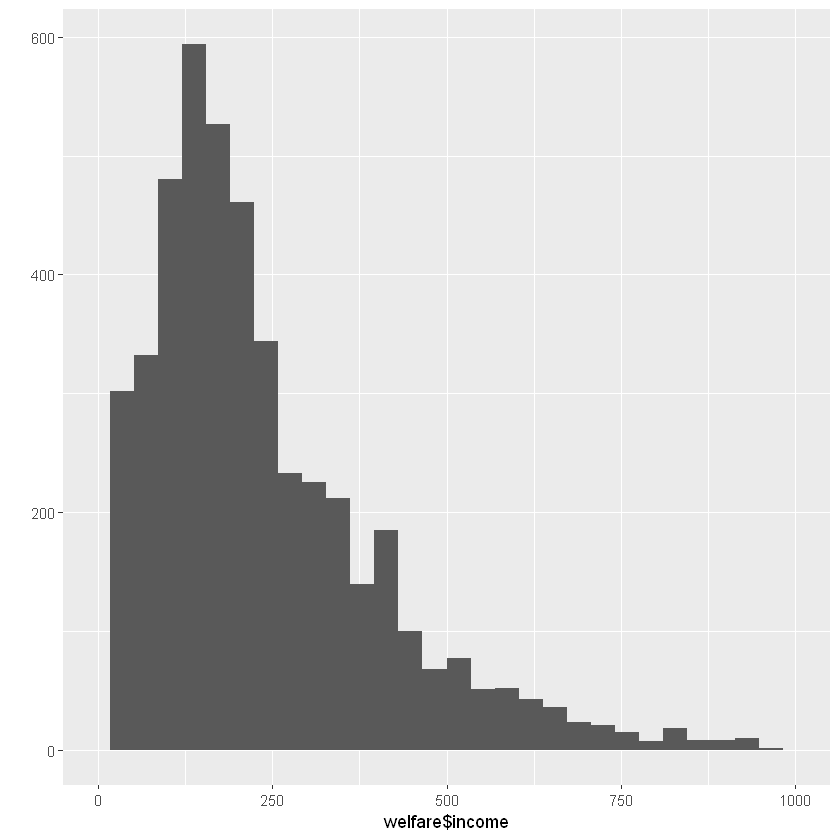

In [28]:
qplot(welfare$income) + xlim(0,1000)

In [29]:
summary(welfare$income)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    0.0   122.0   192.5   241.6   316.6  2400.0   12030 

In [30]:
# 이상치 처리
welfare$income <- ifelse(welfare$income %in% c(0,9999), NA, welfare$income)

In [31]:
# NA 결측치
table(is.na(welfare$income))


FALSE  TRUE 
 4620 12044 

In [32]:
#성별에 따른 월급 차이 분석하기
sex_income <- welfare %>% 
    filter(!is.na(income)) %>% 
    group_by(sex) %>% 
    summarise(mean_income=mean(income))

In [33]:
sex_income

sex,mean_income
<chr>,<dbl>
female,163.2471
male,312.2932


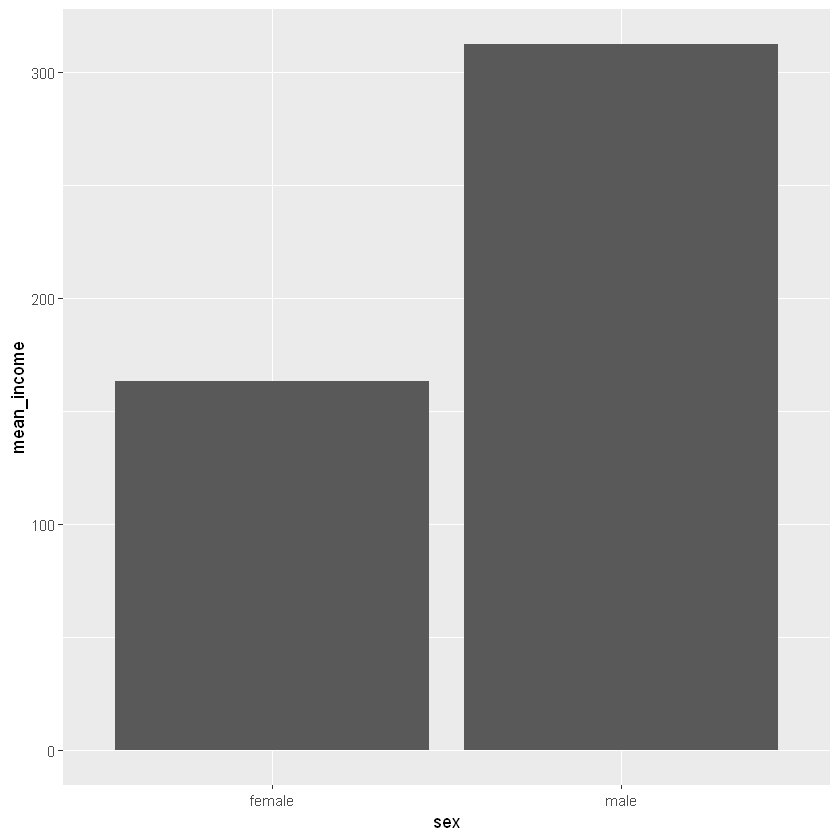

In [34]:
ggplot(data=sex_income, aes(x=sex, y=mean_income)) +
geom_col()

In [35]:
나이와 월급의 관계
몇 살 때 월급을 가장 많이 받을까

ERROR: Error in parse(text = x, srcfile = src): <text>:1:8: 예상하지 못한 기호(symbol)입니다.
1: 나이와 월급의
           ^


In [36]:
class(welfare$birth)
summary(welfare$birth)

[1] "numeric"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1907    1946    1966    1968    1988    2014 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



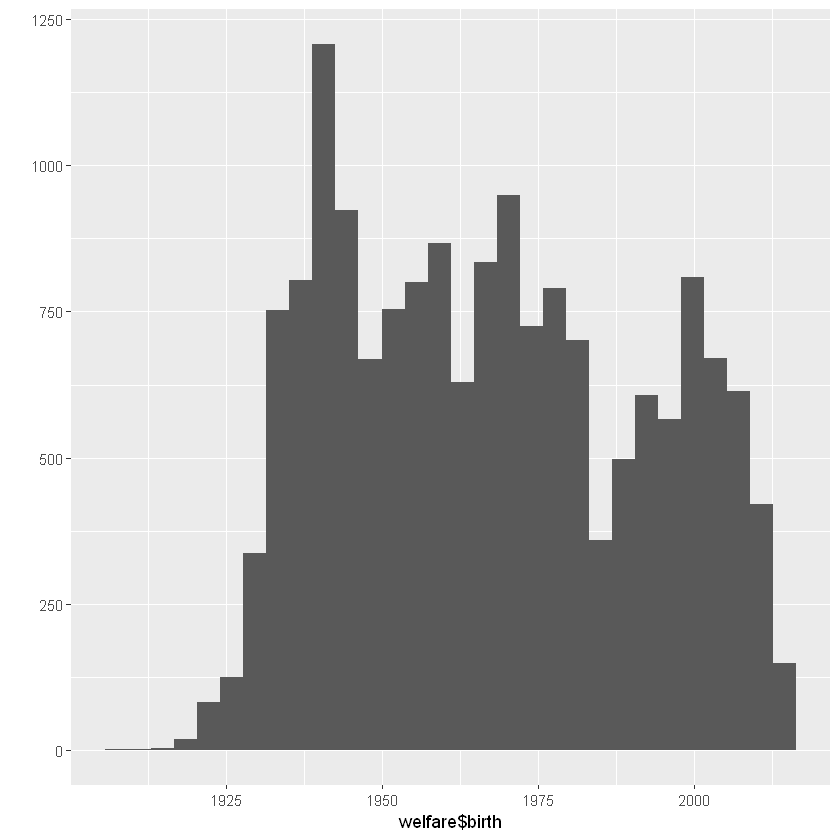

In [37]:
qplot(welfare$birth)

In [38]:
table(is.na(welfare$birth))


FALSE 
16664 

In [39]:
welfare$age <- 2015 - welfare$birth 
summary(welfare$age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   27.00   49.00   47.43   69.00  108.00 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



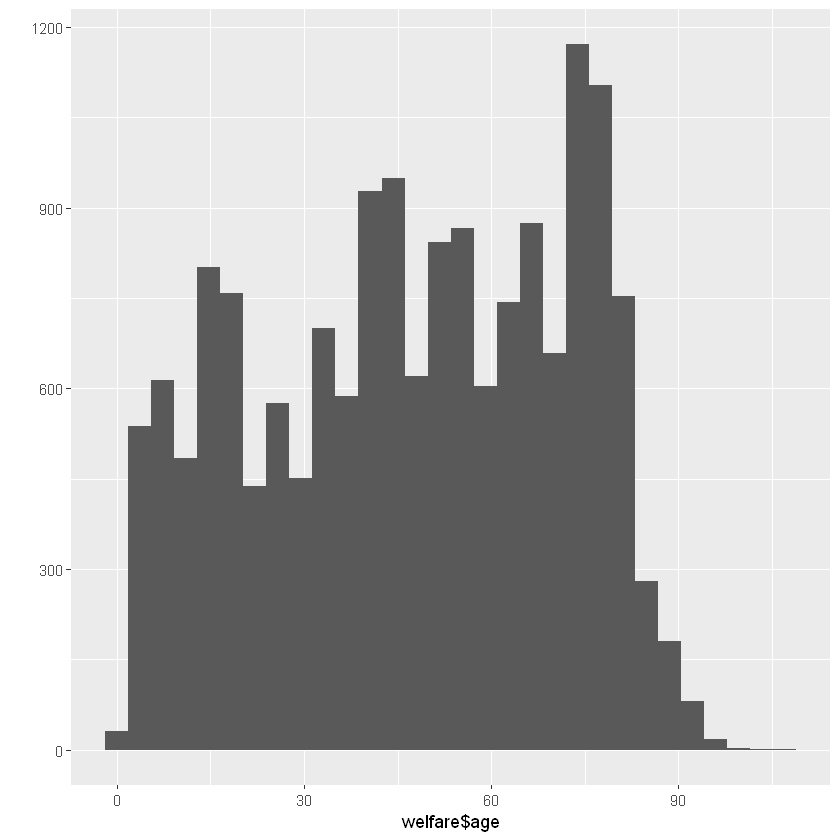

In [40]:
qplot(welfare$age)

In [41]:
#나이에 따른 월급 평균표 만들기
age_income <- welfare %>% 
    filter(!is.na(income)) %>% 
    group_by(age) %>% 
    summarise(mean_income=mean(income))

In [42]:
age_income

age,mean_income
<dbl>,<dbl>
19,121.3000
20,105.5185
21,130.0923
22,141.7157
23,134.0877
24,144.6559
25,157.7284
26,188.2451
27,204.7289


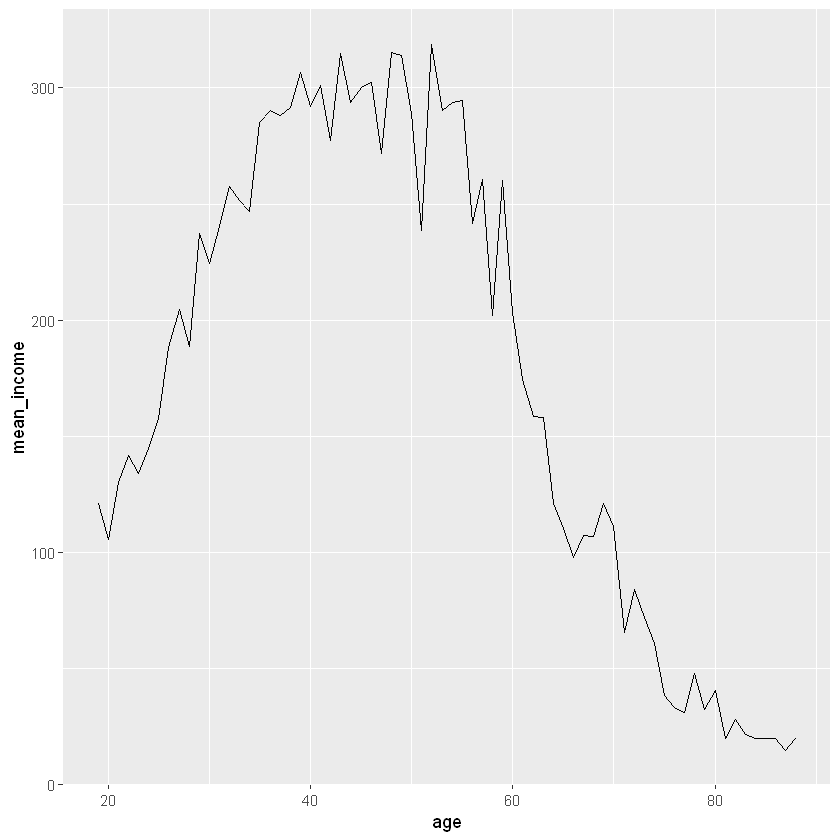

In [43]:
ggplot(data=age_income, aes(x=age, y=mean_income)) +
geom_line()

In [44]:
#어떤 연령대의 월급이 가장 많을까

welfare <- welfare %>% 
    mutate(ageg=ifelse(age < 30, 'young',
                      ifelse(age <= 59,'middle','old')))
table(welfare$ageg)


middle    old  young 
  6128   6072   4464 

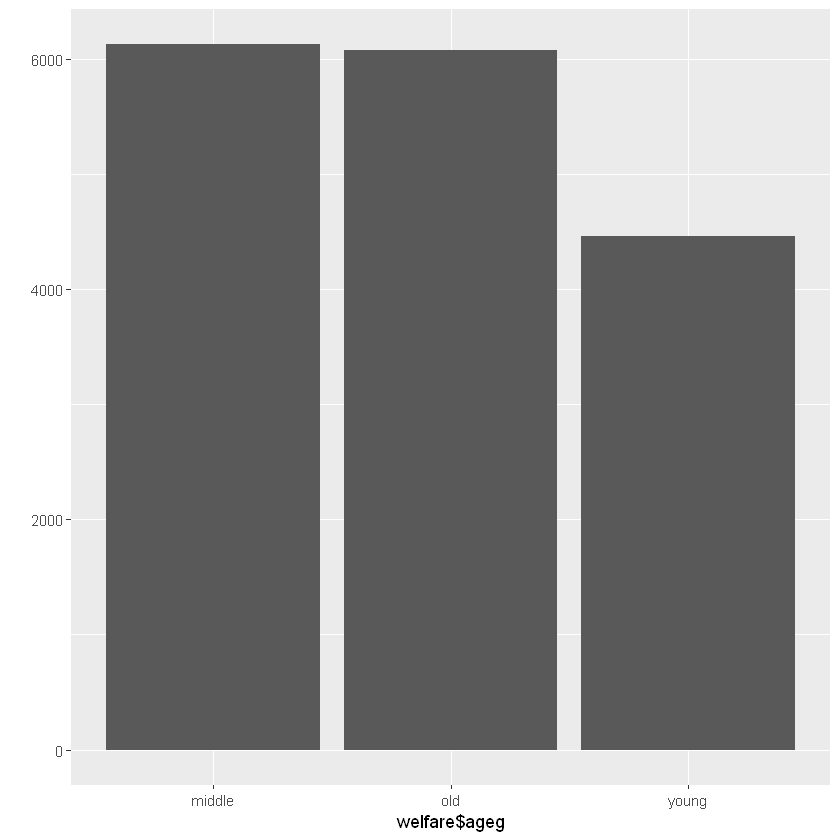

In [45]:
qplot(welfare$ageg)

In [46]:
ageg_income <- welfare %>% 
    filter(!is.na(income)) %>% 
    group_by(ageg) %>% 
    summarise(mean_income=mean(income))
ageg_income

ageg,mean_income
<chr>,<dbl>
middle,282.4978
old,113.2301
young,173.8400


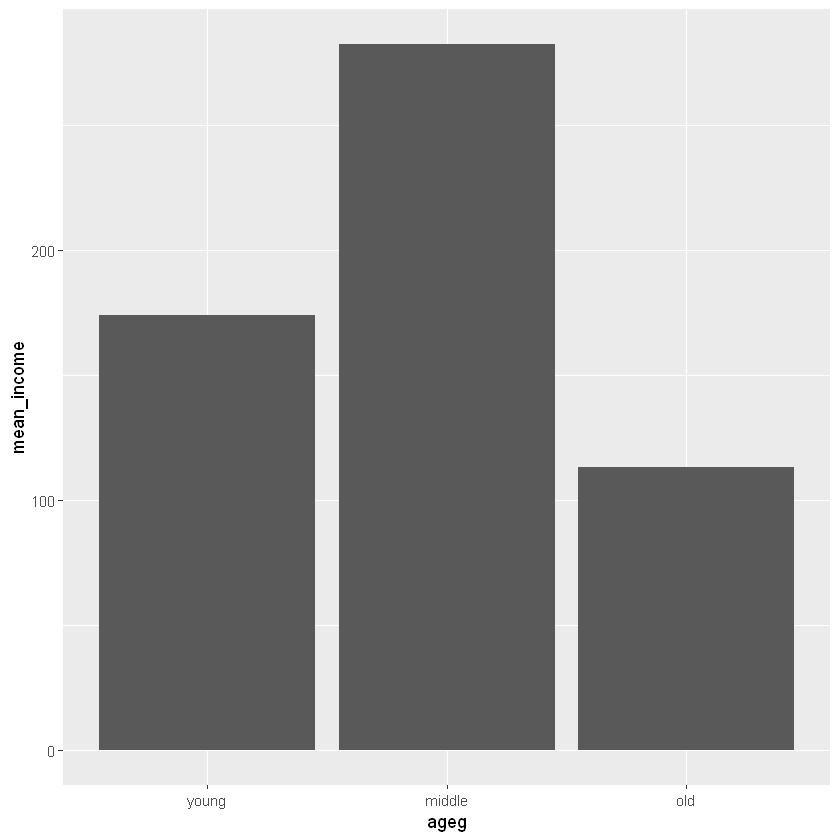

In [47]:
ggplot(data=ageg_income, aes(x=ageg, y=mean_income)) +
geom_col() +
scale_x_discrete(limits=c('young','middle','old'))

In [48]:
#성별 월급 차이는 연령대별로 다를까?"
sex_income <- welfare %>% 
    filter(!is.na(income)) %>% 
    group_by(ageg, sex) %>% 
    summarise(mean_income=mean(income))
sex_income

`summarise()` has grouped output by 'ageg'. You can override using the `.groups` argument.


ageg,sex,mean_income
<chr>,<chr>,<dbl>
middle,female,186.42441
middle,male,354.62883
old,female,75.72841
old,male,156.79832
young,female,167.67865
young,male,183.85930


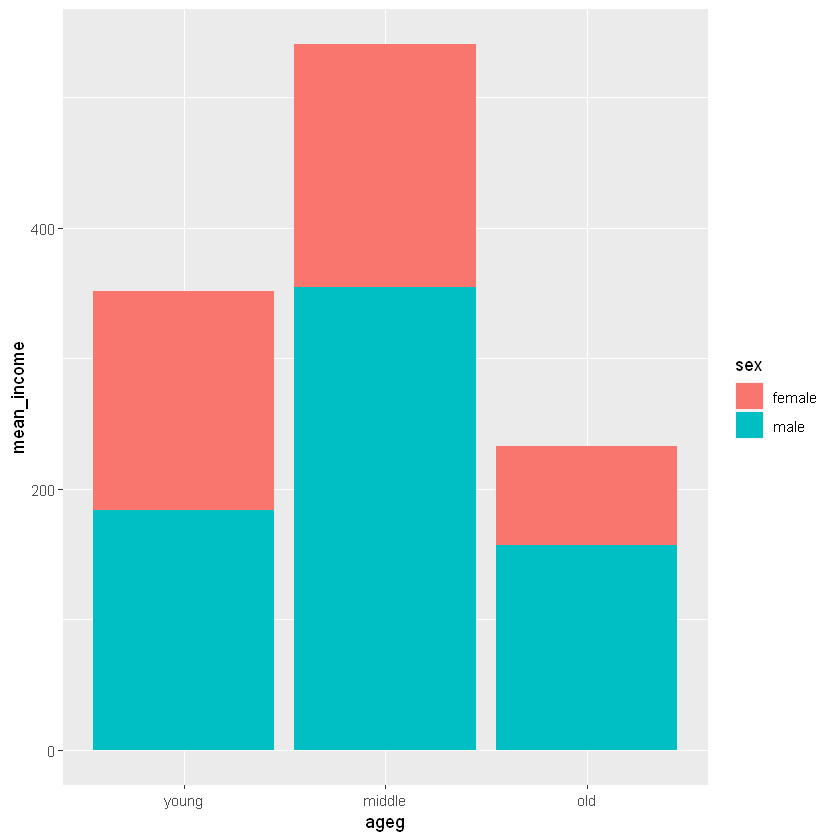

In [49]:
ggplot(data=sex_income, aes(x=ageg, y=mean_income, fill=sex))+
geom_col()+
scale_x_discrete(limits=c('young','middle','old'))